# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from get_data import init_column_map, pull, pull_data_rowwise
from segmentation import filter_data

In [2]:
from plotting import (
    get_column_label,
    plot_bars,
    plot_stacked_bars,
    plot_heatmap
)

In [3]:
# Define all variable categories
from variables import (
    demographics, 
    input_variables_vehicle_ownership, 
    familiarity, 
    kms_driven, 
    renewables_at_home,
    parking, 
    q6a_cols, 
    energ_literacy, 
    renewables_at_home, 
    intent_to_purchase_vehicle,
    benefits_v2g, 
    concerns_v2g, 
    interest_in_services, 
    consider_using_NRMA_for,
    charging_control, 
    preference_on_batt_use, 
    expected_return,
    q6a_petrol, q6a_ev, 
    q6a_plughyb, 
    q6a_hybrid,
    feature_label_map
)

# 2. Setup

## 2.1. Dataframe setup

In [4]:
csv_file = './data/survey_pre_processed_data.csv'

In [5]:
init_column_map(csv_file)

In [6]:
for col in input_variables_vehicle_ownership:
    freq = pull(col, csv_file)  # returns a dictionary {answer_value: count}
    print(f"Frequency for {col} => {freq}")

for col in demographics:
    freq = pull(col, csv_file)
    print(f"Frequency for {col} => {freq}")

Frequency for Q1_1 => {'1': 874, '0': 484}
Frequency for Q1_2 => {'0': 590, '1': 768}
Frequency for Q1_3 => {'0': 1325, '1': 33}
Frequency for Q1_4 => {'0': 1247, '1': 111}
Frequency for Q1_99 => {'0': 1355, '1': 3}
Frequency for gender => {'Male': 859, 'Not Stated': 140, 'Female': 359}
Frequency for colour_plus => {'LILAC': 232, 'KHAKI': 275, 'PURPLE': 166, 'GREY': 353, 'ORANGE': 167, 'BROWN': 41, 'RED': 29, 'UNKNOWN': 8, 'YELLOW': 36, 'CYAN': 11, 'GREEN': 6}
Frequency for region => {'METROPOLITAN': 478, 'RURAL': 251, 'INTERSTATE': 221, 'REGIONAL': 403, 'UNKNOWN': 5}
Frequency for Q20 => {'2': 774, '3': 178, '4': 161, '5 or more': 57, '1': 188}
Frequency for Q21 => {'Freestanding house': 1025, 'Townhouse': 71, 'Apartment/unit': 179, 'Semidetached or terrace': 62, 'Other (please specify)': 21}
Frequency for Q22 => {'Own outright': 919, 'Own with mortgage': 306, 'Other (please specify)': 31, 'Rent': 102}
Frequency for AgeBand => {'Prefer not to say': 36, '65+': 682, '55-64 years': 299, 

In [7]:
target_variable = 'Q10_2'  # "I would be interested in installing V2G..."

In [8]:
# TBD -> Make function here
columns_of_interest = (
    familiarity +
    kms_driven + 
    renewables_at_home + 
    q6a_cols + 
    demographics + 
    input_variables_vehicle_ownership + 
    parking + 
    benefits_v2g + 
    concerns_v2g +
    energ_literacy +
#   charging_control +
    [target_variable]
    )

rows_data = pull_data_rowwise(columns_of_interest, csv_file)

In [9]:
# Create a pandas DataFrame:
df = pd.DataFrame(rows_data, columns=columns_of_interest)

# Because Q1_x are '0' or '1' strings, converting them to numeric for easier ops
for c in input_variables_vehicle_ownership:
    # convert '0'/'1' -> 0/1
    df[c] = df[c].astype(int)  

df

,Q9,Q2,Q8_1,Q8_2,Q8_99,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q7_1,Q7_2,Q7_3,Q10_2
0,Somewhat familiar,"Less than 10,000",1,0,0,3,5,5,,,...,1,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1,Very familiar,"Less than 10,000",1,1,0,5,5,5,5,5,...,0,0,0,0,0,1,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
2,Not at all familiar,"20,001-50,000",0,0,1,2,1,2,,,...,0,0,0,0,0,0,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree
3,Not at all familiar,"Less than 10,000",0,0,1,,,,,,...,0,0,0,0,0,0,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat disagree
4,Very familiar,"20,001-50,000",1,1,0,5,5,5,4,4,...,0,1,0,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Somewhat familiar,"10,000-20,000",1,1,0,,,,1,3,...,1,1,0,0,0,0,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree
1354,Somewhat familiar,"Less than 10,000",0,0,1,5,5,5,,,...,0,0,1,0,1,0,Strongly agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1355,Very familiar,"10,000-20,000",1,0,0,4,4,5,4,4,...,0,1,0,0,1,0,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree
1356,Very familiar,"10,000-20,000",0,0,1,,,,3,5,...,0,0,0,0,1,0,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree


## 2.2. Segmentation

In [10]:
'''

Here's the only thing different from previous notebook.
We'll consider a segmentation based on a question (or combination of)

e.g.:
segment_1_filters = ["Q1_2 == '1'", "(Q3_1 == '1') | (Q3_2 == '1')"]
or
filters = ["Q1_2 == '1'"]

'''

'\n\nHere\'s the only thing different from previous notebook.\nWe\'ll consider a segmentation based on a question (or combination of)\n\ne.g.:\nsegment_1_filters = ["Q1_2 == \'1\'", "(Q3_1 == \'1\') | (Q3_2 == \'1\')"]\nor\nfilters = ["Q1_2 == \'1\'"]\n\n'

In [11]:
filters = ["Q1_2 == 1"]
segment_name = 'EV owners'
df = filter_data(df, filters)

In [12]:
df

,Q9,Q2,Q8_1,Q8_2,Q8_99,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,...,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_99,Q7_1,Q7_2,Q7_3,Q10_2
1,Very familiar,"Less than 10,000",1,1,0,5,5,5,5,5,...,0,0,0,0,0,1,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
4,Very familiar,"20,001-50,000",1,1,0,5,5,5,4,4,...,0,1,0,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree
5,Very familiar,"20,001-50,000",1,0,0,5,5,5,5,5,...,0,0,1,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
9,Very familiar,"20,001-50,000",0,0,1,3,5,5,3,5,...,0,0,1,0,0,0,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly agree
10,Somewhat familiar,"10,000-20,000",1,0,0,2,2,5,1,3,...,1,1,0,0,0,0,Strongly agree,Strongly agree,Somewhat agree,Neither agree nor disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Very familiar,"10,000-20,000",1,0,0,,,,2,3,...,0,1,0,0,1,0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
1353,Somewhat familiar,"10,000-20,000",1,1,0,,,,1,3,...,1,1,0,0,0,0,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree
1355,Very familiar,"10,000-20,000",1,0,0,4,4,5,4,4,...,0,1,0,0,1,0,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree
1356,Very familiar,"10,000-20,000",0,0,1,,,,3,5,...,0,0,0,0,1,0,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree


# 2. Descriptive Analytics

## 2.1. Demographics:

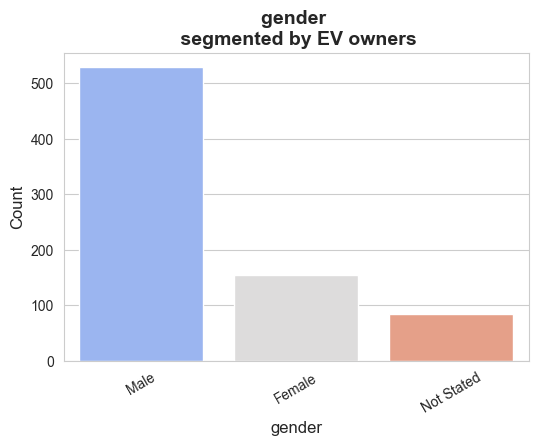

In [13]:
plot_bars(df, column="gender", segment_name=segment_name, question_map=feature_label_map)

<Figure size 800x500 with 0 Axes>

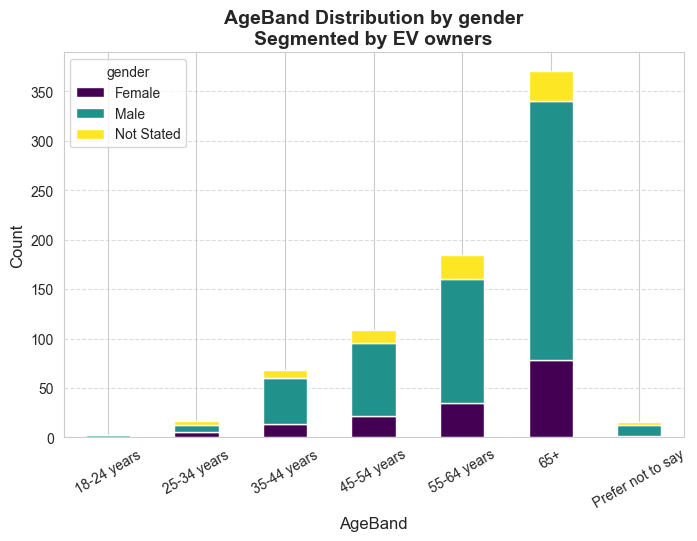

In [22]:
plot_stacked_bars(df, "AgeBand", "gender", segment_name, question_map=feature_label_map)

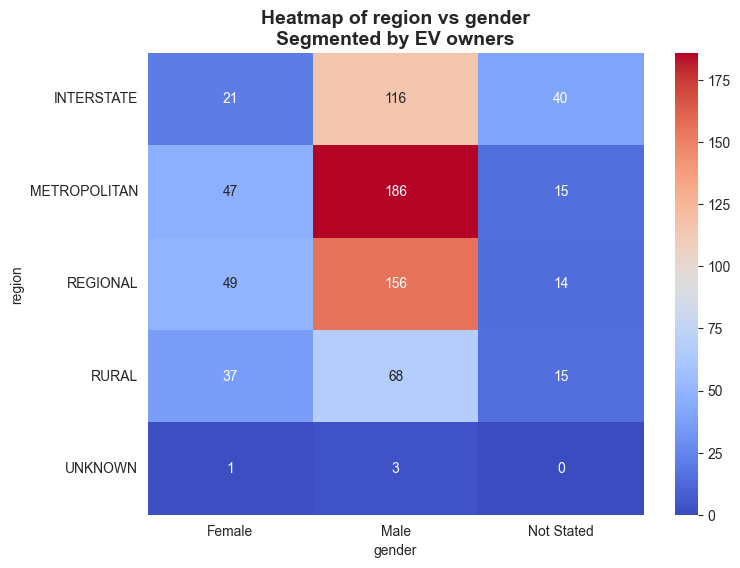

In [23]:
plot_heatmap(df, "region", "gender", segment_name, question_map=feature_label_map)

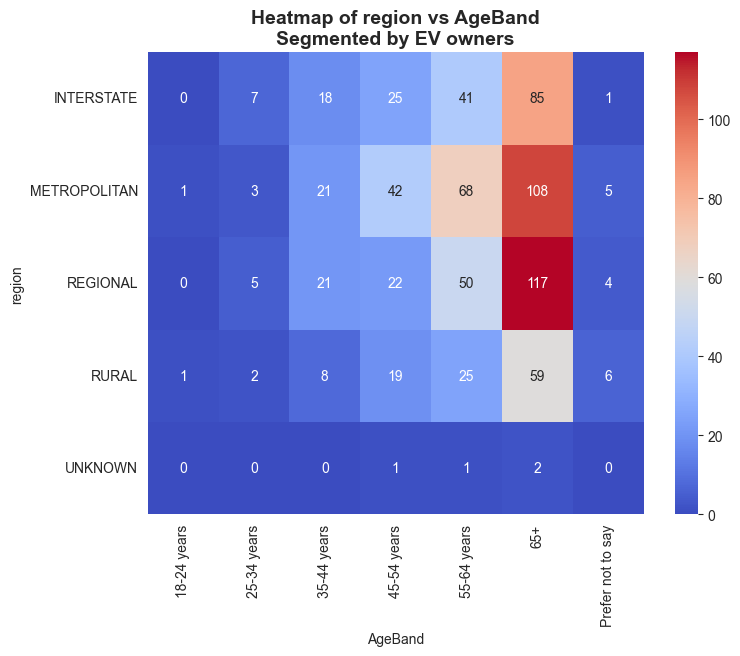

In [24]:
plot_heatmap(df, "region", "AgeBand", segment_name, question_map=feature_label_map)

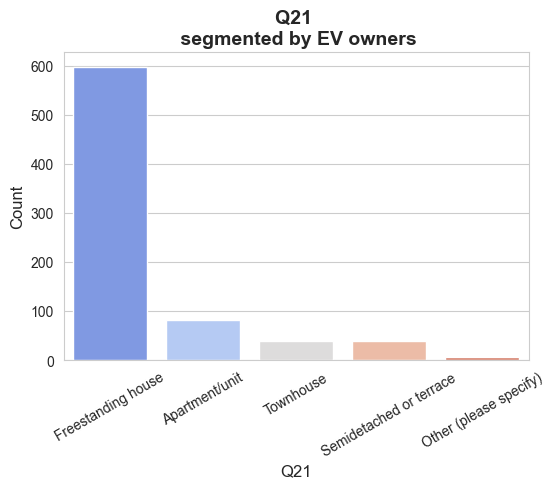

In [25]:
plot_bars(df, "Q21", segment_name, question_map=feature_label_map)

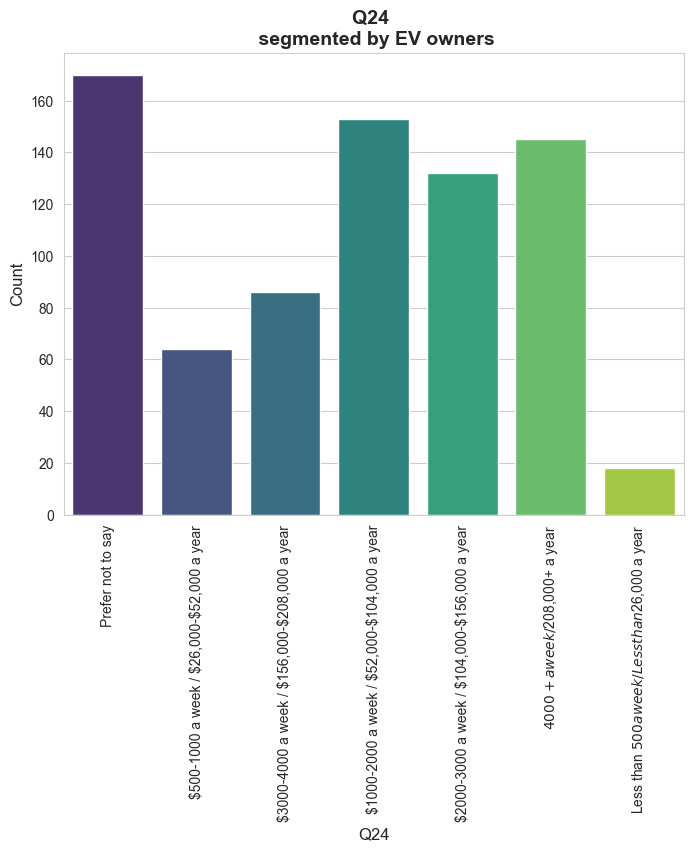

In [18]:
plot_bars(df, "Q24", segment_name, figsize=(8,6), rotation=90, palette="viridis")

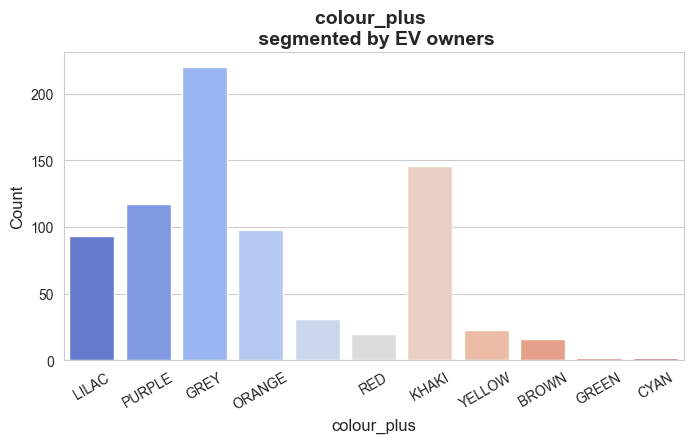

In [19]:
plot_bars(df, 'colour_plus',segment_name, figsize=(8,4))

## 2.2. Capability / Knowledge

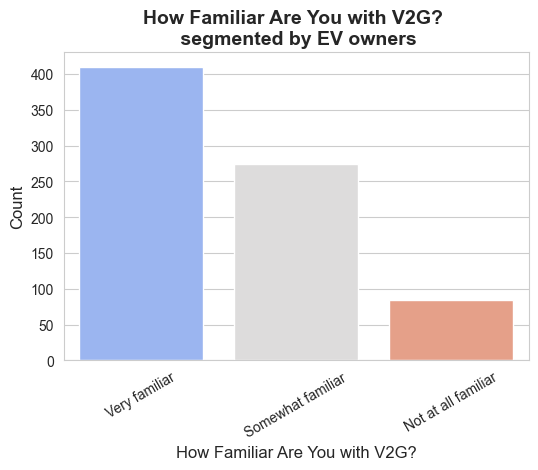

In [26]:
plot_bars(df, column="Q9", segment_name=segment_name, question_map=feature_label_map)

## 2.3. Opportunity / Environment

### 2.3.1. Vehicle ownership

In [ ]:
# Redundant for this one

### 2.3.2. Parking access

In [27]:
# Change string to numeric
df[parking] = df[parking].apply(pd.to_numeric, errors='coerce')

C:\Users\24417507\AppData\Local\Temp\ipykernel_16500\1456524138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parking] = df[parking].apply(pd.to_numeric, errors='coerce')


In [40]:
# First, get a series of how many times each Q3_x was 1:
parking_counts = df[parking].sum()
parking_counts = parking_counts.rename(index=feature_label_map)

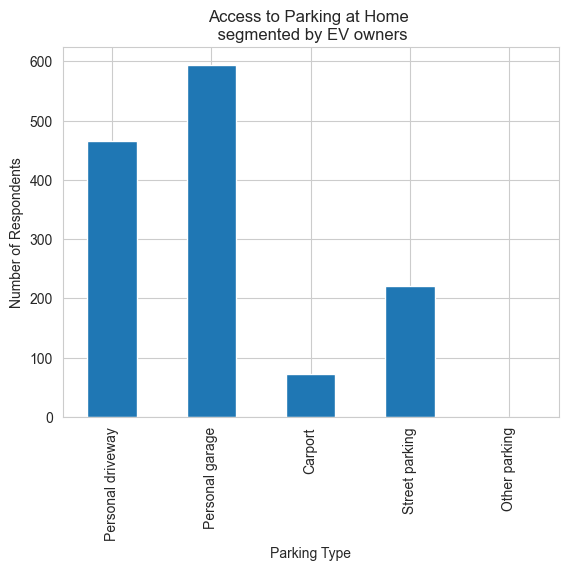

In [41]:
parking_counts.plot(kind='bar')
plt.title(f'Access to Parking at Home \n segmented by {segment_name}')
plt.xlabel('Parking Type')
plt.ylabel('Number of Respondents')
plt.show()

### 2.4.3. Time of day car parked at home

In [42]:
'''
##########################################
# Pull the data from CSV
##########################################
init_column_map(csv_file)

# We'll get both Q6a columns and the demographic columns
# columns_of_interest = q6a_cols + demographics + energ_literacy 
columns_of_interest = q6a_cols + input_variables_vehicle_ownership + demographics + energ_literacy + intent_to_purchase_vehicle + benefits_v2g + concerns_v2g + charging_control + preference_on_batt_use

rows = pull_data_rowwise(columns_of_interest, csv_file)

# Make a DataFrame
df = pd.DataFrame(rows, columns=columns_of_interest)'''

"\n##########################################\n# Pull the data from CSV\n##########################################\ninit_column_map(csv_file)\n\n# We'll get both Q6a columns and the demographic columns\n# columns_of_interest = q6a_cols + demographics + energ_literacy \ncolumns_of_interest = q6a_cols + input_variables_vehicle_ownership + demographics + energ_literacy + intent_to_purchase_vehicle + benefits_v2g + concerns_v2g + charging_control + preference_on_batt_use\n\nrows = pull_data_rowwise(columns_of_interest, csv_file)\n\n# Make a DataFrame\ndf = pd.DataFrame(rows, columns=columns_of_interest)"

In [43]:
# Converting  "0 - Weekdays"
for col in q6a_cols:
    df[col] = df[col].replace("0 - Weekdays", 0)  # Convert "0 - Weekdays" to 0
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert all values to numbers
# Debugging: Check unique values in each column
for col in q6a_cols:
    print(f"Unique values in {col}: {df[col].dropna().unique()}")

Unique values in Q6ax1_1: [5. 3. 2. 0. 4. 1.]
Unique values in Q6ax1_2: [5. 2. 4. 3. 0. 1.]
Unique values in Q6ax1_3: [5. 4. 0. 3. 2. 1.]
Unique values in Q6ax2_1: [5 4 3 1 2 0]
Unique values in Q6ax2_2: [5 4 3 2 0 1]
Unique values in Q6ax2_3: [5 4 3 1 0 2]
Unique values in Q6ax3_1: [3. 1. 2. 4. 5.]
Unique values in Q6ax3_2: [5. 2.]
Unique values in Q6ax3_3: [5. 2.]
Unique values in Q6ax4_1: [2. 0. 5. 3. 4. 1.]
Unique values in Q6ax4_2: [2. 0. 4. 5. 3. 1.]
Unique values in Q6ax4_3: [5. 0. 4. 1.]


C:\Users\24417507\AppData\Local\Temp\ipykernel_16500\3304422154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace("0 - Weekdays", 0)  # Convert "0 - Weekdays" to 0
C:\Users\24417507\AppData\Local\Temp\ipykernel_16500\3304422154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert all values to numbers


In [44]:
# Count missing responses for each charging question
missing_counts = (df[q6a_cols] == 0).sum()
# Display summary of non-responses per column
print("Number of responses recorded as 0:")
print(missing_counts)


Number of responses recorded as 0:
Q6ax1_1     41
Q6ax1_2      8
Q6ax1_3     10
Q6ax2_1    102
Q6ax2_2     24
Q6ax2_3     14
Q6ax3_1      0
Q6ax3_2      0
Q6ax3_3      0
Q6ax4_1      5
Q6ax4_2      2
Q6ax4_3      2
dtype: int64


In [45]:
# Checking number of vehicles per type
print(df[q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid].notna().sum())

Q6ax1_1    342
Q6ax1_2    342
Q6ax1_3    342
Q6ax2_1    768
Q6ax2_2    768
Q6ax2_3    768
Q6ax3_1      9
Q6ax3_2      9
Q6ax3_3      9
Q6ax4_1     35
Q6ax4_2     35
Q6ax4_3     35
dtype: int64


In [46]:
# Prepare data for heatmap
counts_dict = {vehicle: [] for vehicle in ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]}
time_periods = ["10AM-3PM", "4PM-9PM", "9PM-6AM"]
vehicle_types = ["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"]

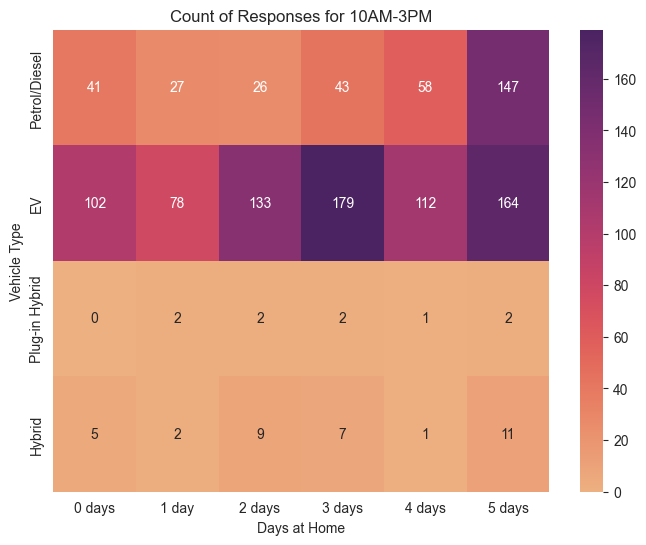

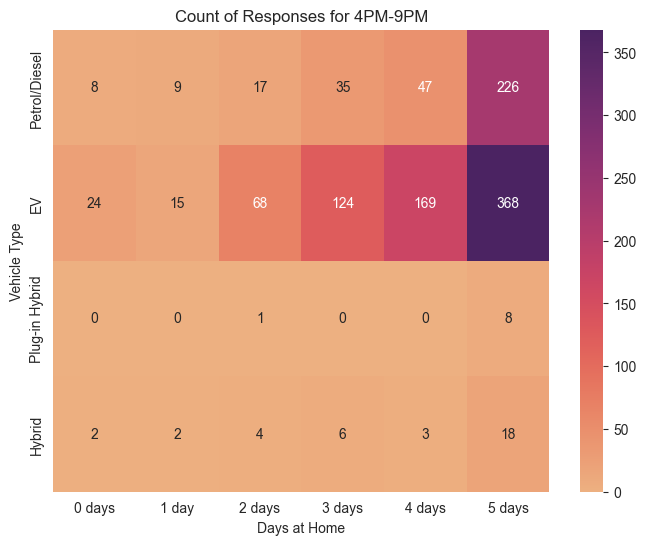

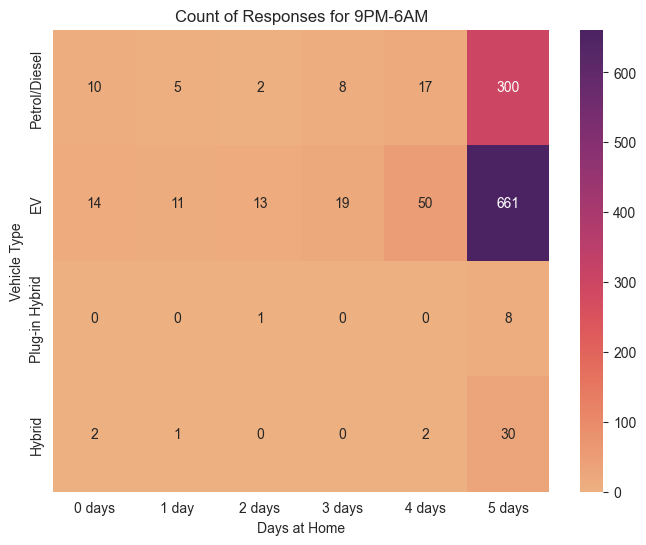

In [47]:
# Iterate over each time period and vehicle type
for time_idx in range(3):  # Three time periods
    for vehicle_idx, vehicle_label in enumerate(vehicle_types):
        vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]
        counts = df[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(range(6), fill_value=0).values
        counts_dict[vehicle_label].append(counts)

# Convert to numpy array and reshape correctly
heatmap_data = np.array([counts_dict[v] for v in vehicle_types])  # Ensures order matches vehicle_types

# Debugging: Compare values with Excel
## print("Heatmap Data:\n", heatmap_data)

# Plot heatmap for each time period
for i, time_period in enumerate(time_periods):
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data[:, i, :], annot=True, cmap="flare", fmt="d", 
                xticklabels=["0 days", "1 day", "2 days", "3 days", "4 days", "5 days"], 
                yticklabels=vehicle_types)

    plt.title(f"Count of Responses for {time_period}")
    plt.xlabel("Days at Home")
    plt.ylabel("Vehicle Type")
    plt.show()

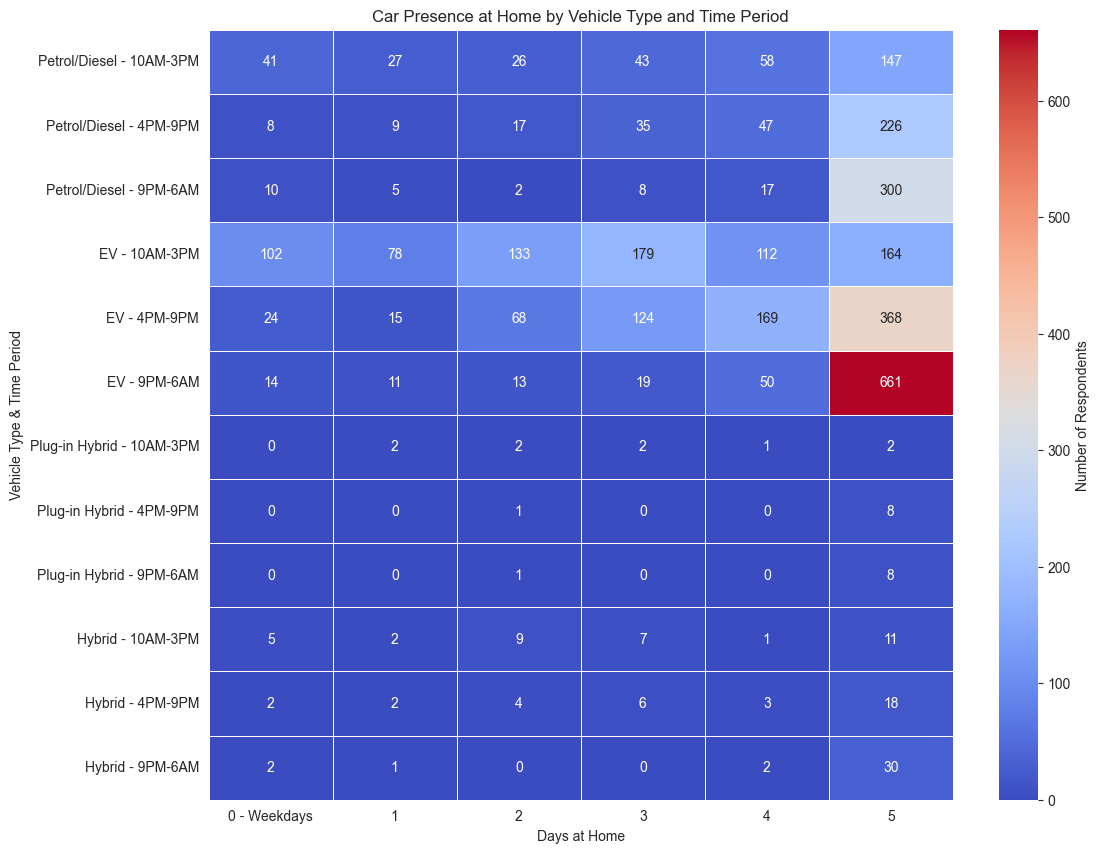

In [48]:
# Define time periods and vehicle types
day_counts = range(6)  # 0 to 5 days

# Prepare heatmap data storage
heatmap_data = []
row_labels = []

# Iterate over each vehicle type and time period
for vehicle_idx, vehicle_label in enumerate(vehicle_types):
    for time_idx, time_label in enumerate(time_periods):
        vehicle_columns = [q6a_petrol, q6a_ev, q6a_plughyb, q6a_hybrid][vehicle_idx]

        # Drop NaNs before counting
        counts = df[vehicle_columns[time_idx]].dropna().astype(int).value_counts().reindex(day_counts, fill_value=0).values

        # Store heatmap data
        heatmap_data.append(counts)
        row_labels.append(f"{vehicle_label} - {time_label}")  # Proper row label for heatmap

# Convert heatmap data into a DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["0 - Weekdays", "1", "2", "3", "4", "5"])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, cbar_kws={"label": "Number of Respondents"})

plt.title("Car Presence at Home by Vehicle Type and Time Period")
plt.xlabel("Days at Home")
plt.ylabel("Vehicle Type & Time Period")
plt.xticks(rotation=0)  # Keep labels readable
plt.yticks(rotation=0)

plt.show()

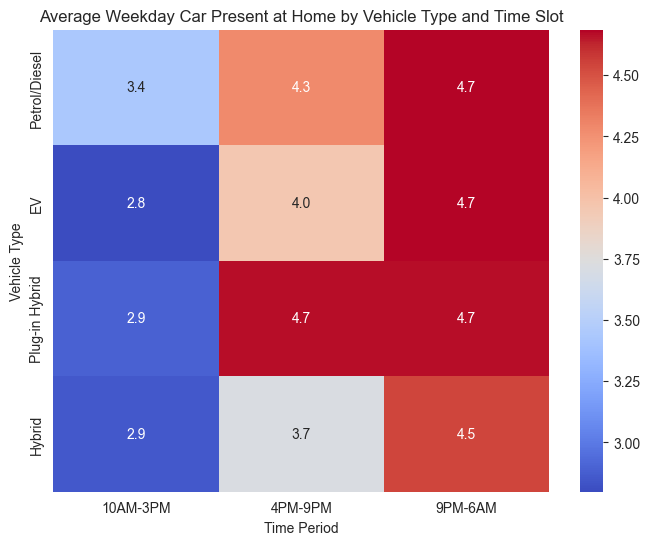

In [49]:
plt.figure(figsize=(8, 6))

# Calculate mean responses (average days home)
heatmap_data = df[q6a_cols].apply(pd.to_numeric, errors='coerce').mean().values.reshape(4,3)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", 
            xticklabels=["10AM-3PM", "4PM-9PM", "9PM-6AM"], 
            yticklabels=["Petrol/Diesel", "EV", "Plug-in Hybrid", "Hybrid"])

plt.title("Average Weekday Car Present at Home by Vehicle Type and Time Slot")
plt.xlabel("Time Period")
plt.ylabel("Vehicle Type")
plt.show()


## 2.4. Attitude / Motivation

In [50]:
# Ordered categories for Likert scale
category_order = [
    "Strongly disagree",
    "Somewhat disagree",
    "Neither agree nor disagree",
    "Somewhat agree",
    "Strongly agree"
]

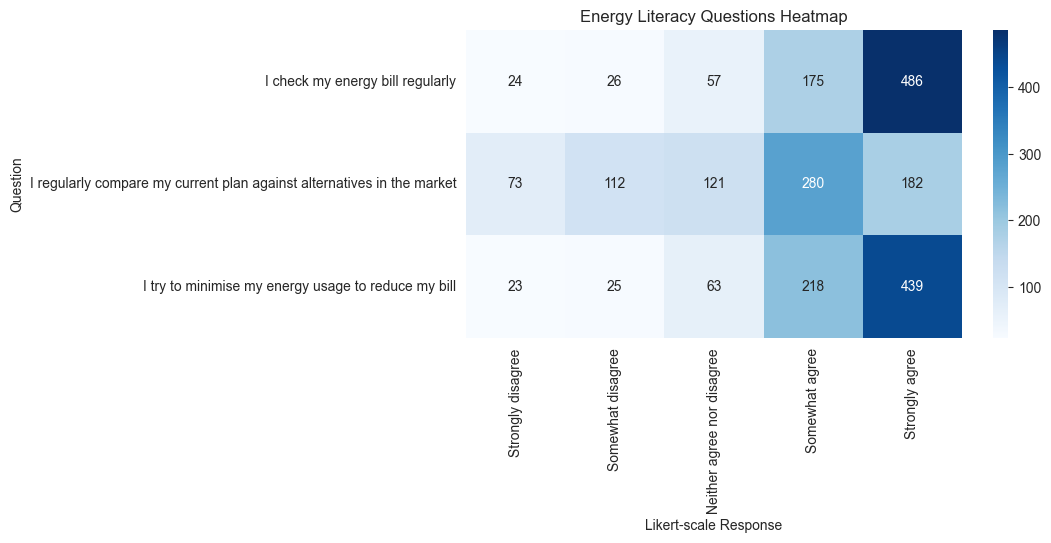

In [51]:
# 1. Subset only relevant columns
df_subset = df[energ_literacy]

# 2. Melt (unpivot) the data
df_melted = df_subset.melt(var_name='Question', value_name='Answer')

# 3. Convert answers to categorical in the specified order
df_melted['Answer'] = pd.Categorical(
    df_melted['Answer'],
    categories=category_order,
    ordered=True
)

# 4. Replace short codes with descriptive labels
df_melted['Question_label'] = df_melted['Question'].replace(feature_label_map)

# 5. Build crosstab using the new Question_label column
freq_table = pd.crosstab(df_melted['Question_label'], df_melted['Answer'])

# 6. Plot the heatmap (row labels will now show the descriptive text)
plt.figure(figsize=(8, 4))
sns.heatmap(freq_table, annot=True, cmap='Blues', fmt='d')
plt.title('Energy Literacy Questions Heatmap')
plt.ylabel('Question')
plt.xlabel('Likert-scale Response')
plt.show()

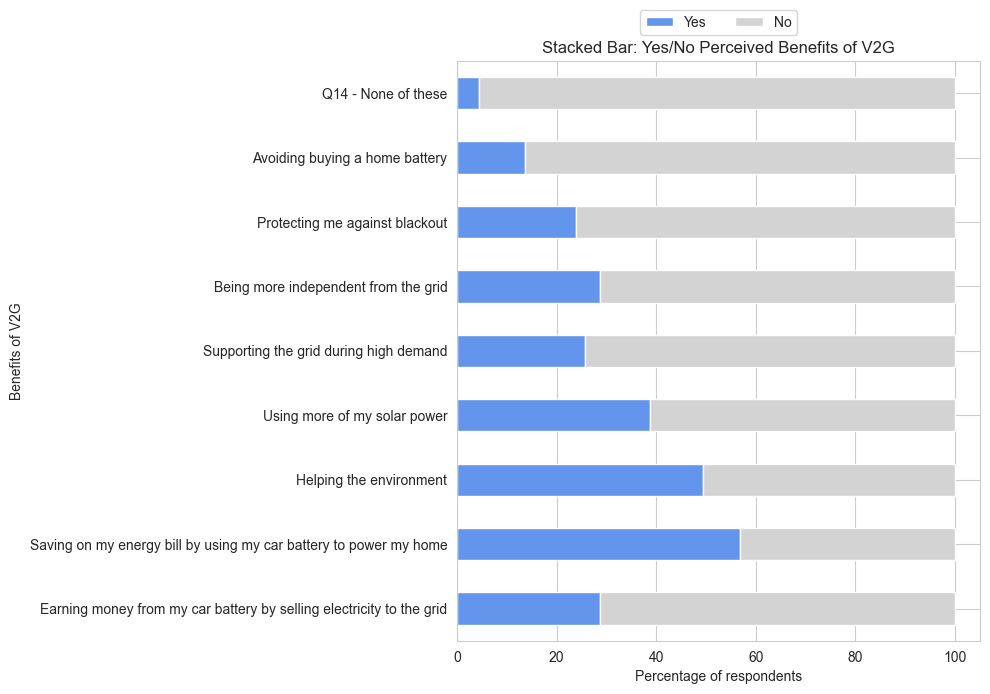

In [52]:
df_subset = df[benefits_v2g].copy()
df_subset = df_subset.replace({"0": 0, "1": 1}).astype(float)

# Calculate %Yes and %No for each column
yes_counts = df_subset.sum()            # number of "1"s per question
no_counts = df_subset.shape[0] - yes_counts  # number of "0"s per question
prop_yes = (yes_counts / df_subset.shape[0]) * 100
prop_no  = (no_counts  / df_subset.shape[0]) * 100

stacked_df = pd.DataFrame({
    "Yes": prop_yes,
    "No": prop_no
})

# Convert question codes to descriptive labels
stacked_df.index = stacked_df.index.to_series().replace(feature_label_map)

# Plot the bars
ax = stacked_df.plot(kind="barh", stacked=True, color=["cornflowerblue", "lightgray"], figsize=(10, 7))

# Move the legend to the top center
ax.legend(
    loc="upper center",        # put the legend on the top center of the axes
    bbox_to_anchor=(0.5, 1.10),# shift the legend box so it's slightly above
    ncol=2                     # show legend items in two columns
)

plt.xlabel("Percentage of respondents")
plt.ylabel("Benefits of V2G")
plt.title("Stacked Bar: Yes/No Perceived Benefits of V2G")
plt.tight_layout()
plt.show()

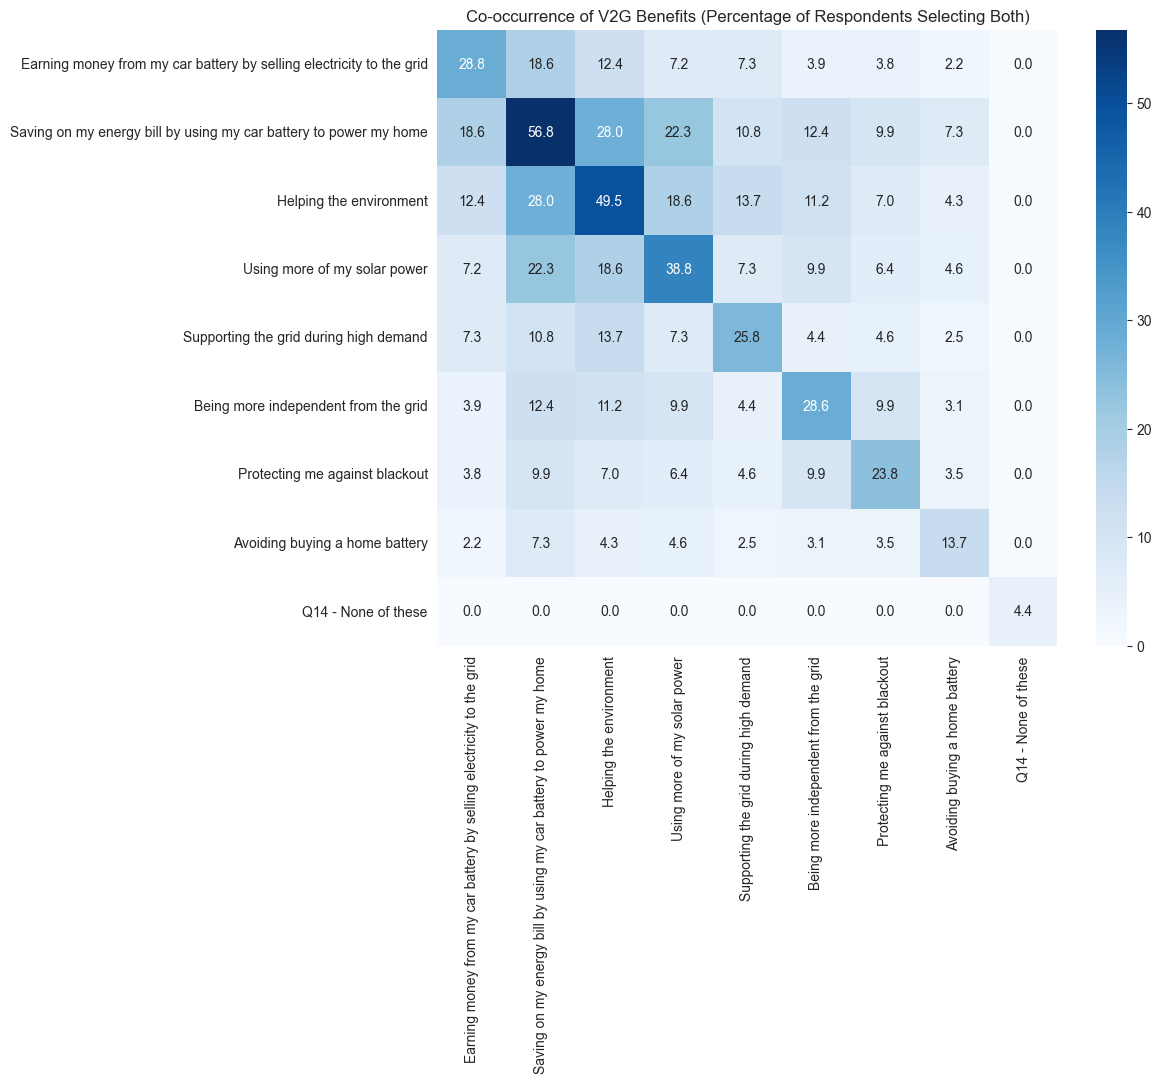

In [53]:
df_subset = df[benefits_v2g].replace({"0": 0, "1": 1}).astype(float)

# co-occurrence = sum of the product across rows => how many '1' in both columns
co_occurrence = df_subset.T.dot(df_subset)

# Convert to fraction or keep as raw count
co_occurrence_frac = co_occurrence / df_subset.shape[0] * 100

# Rename rows & columns to descriptive labels
co_occurrence_frac.index = co_occurrence_frac.index.to_series().replace(feature_label_map)
co_occurrence_frac.columns = co_occurrence_frac.columns.to_series().replace(feature_label_map)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_frac, annot=True, cmap="Blues", fmt=".1f")
plt.title("Co-occurrence of V2G Benefits (Percentage of Respondents Selecting Both)")
plt.show()

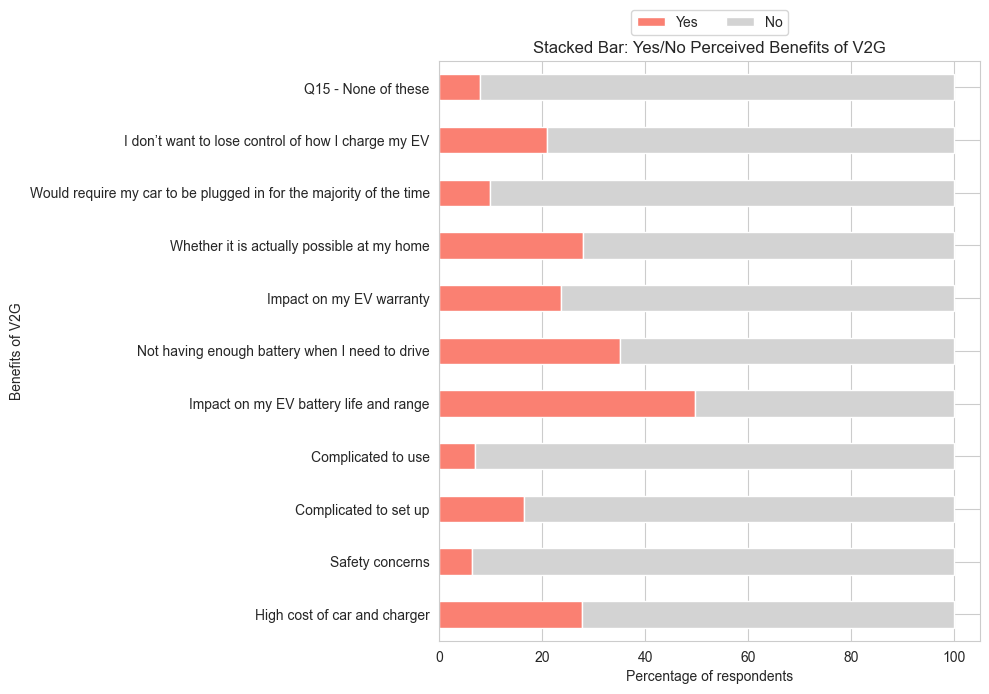

In [54]:
df_subset = df[concerns_v2g].copy()
df_subset = df_subset.replace({"0": 0, "1": 1}).astype(float)

# Calculate %Yes and %No for each column
yes_counts = df_subset.sum()            # number of "1"s per question
no_counts = df_subset.shape[0] - yes_counts  # number of "0"s per question
prop_yes = (yes_counts / df_subset.shape[0]) * 100
prop_no  = (no_counts  / df_subset.shape[0]) * 100

stacked_df = pd.DataFrame({
    "Yes": prop_yes,
    "No": prop_no
})

# Convert question codes to descriptive labels
stacked_df.index = stacked_df.index.to_series().replace(feature_label_map)

# Plot the bars
ax = stacked_df.plot(kind="barh", stacked=True, color=["salmon", "lightgray"], figsize=(10, 7))

# Move the legend to the top center
ax.legend(
    loc="upper center",        # put the legend on the top center of the axes
    bbox_to_anchor=(0.5, 1.10),# shift the legend box so it's slightly above
    ncol=2                     # show legend items in two columns
)

plt.xlabel("Percentage of respondents")
plt.ylabel("Benefits of V2G")
plt.title("Stacked Bar: Yes/No Perceived Benefits of V2G")
plt.tight_layout()
plt.show()

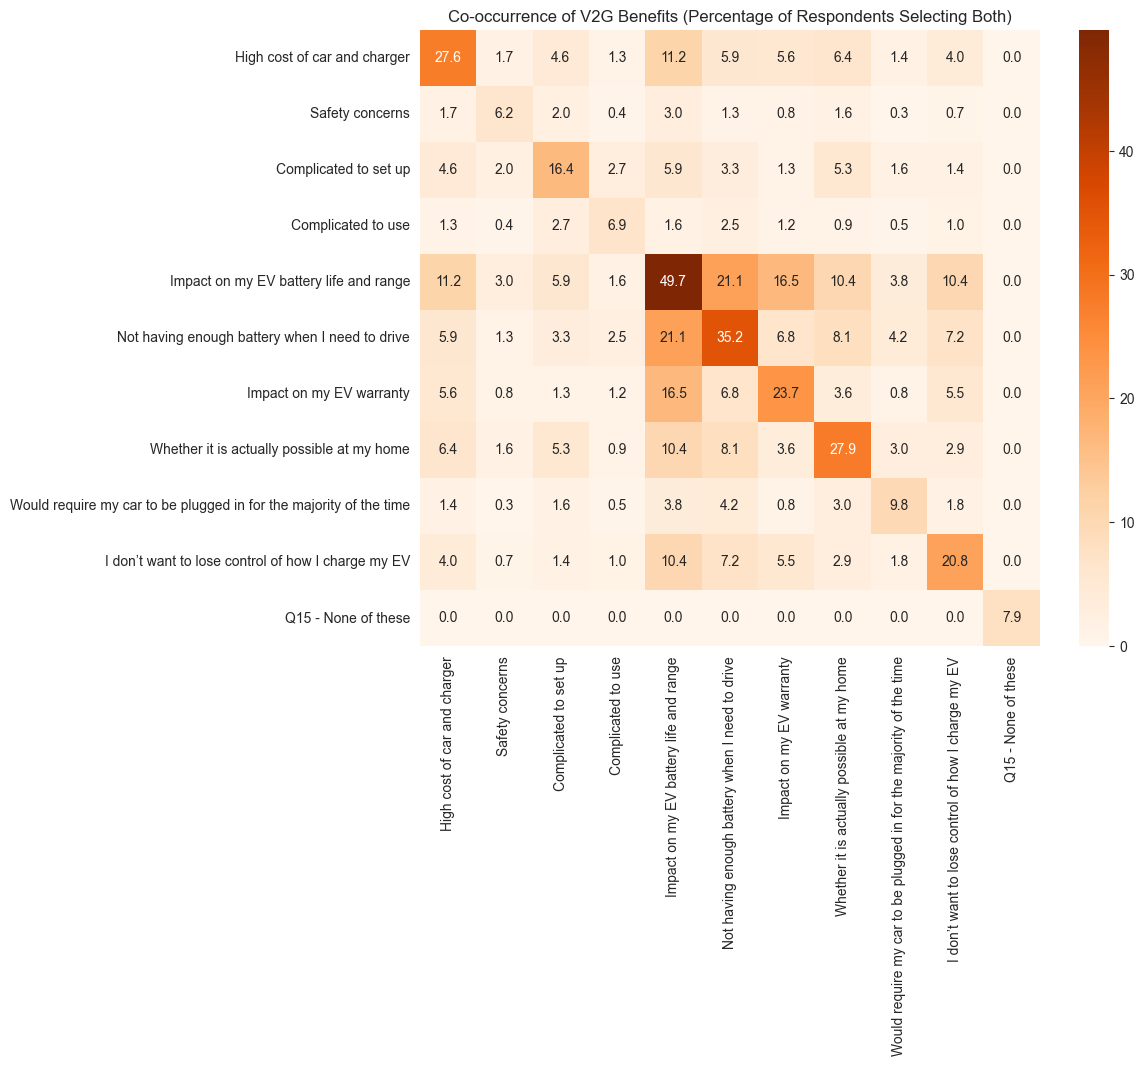

In [55]:
df_subset = df[concerns_v2g].replace({"0": 0, "1": 1}).astype(float)

# co-occurrence = sum of the product across rows => how many '1' in both columns
co_occurrence = df_subset.T.dot(df_subset)

# Convert to fraction or keep as raw count
co_occurrence_frac = co_occurrence / df_subset.shape[0] * 100

# Rename rows & columns to descriptive labels
co_occurrence_frac.index = co_occurrence_frac.index.to_series().replace(feature_label_map)
co_occurrence_frac.columns = co_occurrence_frac.columns.to_series().replace(feature_label_map)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_frac, annot=True, cmap="Oranges", fmt=".1f")
plt.title("Co-occurrence of V2G Benefits (Percentage of Respondents Selecting Both)")
plt.show()

# 3. Filtering down

## 3.1. Filtering Demographic

In [ ]:

def filter_dataframe_by_demographics(df, region=None, age_band=None, gender=None, colour_plus=None, Q21=None, Q22=None, Q24=None):
    """
    Filters the input DataFrame based on specified demographic criteria.

    Args:
        df (pd.DataFrame): The DataFrame to filter.
        region (str or list, optional): Filter by region. Can be a single region name (str) 
                                        or a list of region names. Defaults to None.
        age_band (str or list, optional): Filter by age band. Can be a single age band (str) 
                                          or a list of age bands. Defaults to None.
        gender (str or list, optional): Filter by gender. Can be a single gender (str) 
                                        or a list of genders. Defaults to None.
        colour_plusregion (str or list, optional): Filter by 'colour_plusregion' column.
        Q21 (str or list, optional): Filter by 'Q21' column (Housing type).
        Q22 (str or list, optional): Filter by 'Q22' column (Housing ownership).
        Q24 (str or list, optional): Filter by 'Q24' column (Income band).

    Returns:
        pd.DataFrame: A new DataFrame filtered based on the provided criteria. 
                      Returns the original DataFrame if no filters are applied or 
                      if filter columns are not found.
    """

    # Starting with a copy to avoid modifying the original DataFrame
    filtered_df = df.copy() 

    # Initializing filter condition to keep all rows
    filter_conditions = pd.Series(True, index=df.index) 

    if region is not None:
        if isinstance(region, str):
            filter_conditions = filter_conditions & (filtered_df['region'] == region)
        elif isinstance(region, list):
            filter_conditions = filter_conditions & (filtered_df['region'].isin(region))
        else:
            print("Warning: 'region' filter should be a string or a list of strings.")

    if age_band is not None:
        if isinstance(age_band, str):
            filter_conditions = filter_conditions & (filtered_df['AgeBand'] == age_band)
        elif isinstance(age_band, list):
            filter_conditions = filter_conditions & (filtered_df['AgeBand'].isin(age_band))
        else:
            print("Warning: 'age_band' filter should be a string or a list of strings.")

    if gender is not None:
        if isinstance(gender, str):
            filter_conditions = filter_conditions & (filtered_df['gender'] == gender)
        elif isinstance(gender, list):
            filter_conditions = filter_conditions & (filtered_df['gender'].isin(gender))
        else:
            print("Warning: 'gender' filter should be a string or a list of strings.")

    if colour_plus is not None:
        if isinstance(colour_plus, str):
            filter_conditions = filter_conditions & (filtered_df['colour_plus'] == colour_plus)
        elif isinstance(colour_plus, list):
            filter_conditions = filter_conditions & (filtered_df['colour_plus'].isin(colour_plus))
        else:
            print("Warning: 'colour_plus' filter should be a string or a list of strings.")

    if Q21 is not None:
        if isinstance(Q21, str):
            filter_conditions = filter_conditions & (filtered_df['Q21'] == Q21)
        elif isinstance(Q21, list):
            filter_conditions = filter_conditions & (filtered_df['Q21'].isin(Q21))
        else:
            print("Warning: 'Q21' filter should be a string or a list of strings.")

    if Q22 is not None:
        if isinstance(Q22, str):
            filter_conditions = filter_conditions & (filtered_df['Q22'] == Q22)
        elif isinstance(Q22, list):
            filter_conditions = filter_conditions & (filtered_df['Q22'].isin(Q22))
        else:
            print("Warning: 'Q22' filter should be a string or a list of strings.")

    if Q24 is not None:
        if isinstance(Q24, str):
            filter_conditions = filter_conditions & (filtered_df['Q24'] == Q24)
        elif isinstance(Q24, list):
            filter_conditions = filter_conditions & (filtered_df['Q24'].isin(Q24))
        else:
            print("Warning: 'Q24' filter should be a string or a list of strings.")


    return filtered_df[filter_conditions]

In [ ]:
# Example 1: Filter for Metropolitan region
filtered_df_metro = filter_dataframe_by_demographics(df, region='METROPOLITAN')
print(f"Shape of DataFrame filtered by Metropolitan region: {filtered_df_metro.shape}")

In [ ]:
# Example 2: Filter for Metropolitan or Rural regions
filtered_df_metro_rural = filter_dataframe_by_demographics(df, region=['METROPOLITAN', 'RURAL'])
print(f"Shape of DataFrame filtered by Metropolitan or Rural region: {filtered_df_metro_rural.shape}")

# Example 3: Filter for Metropolitan region AND age band '55-64 years'
filtered_df_metro_age = filter_dataframe_by_demographics(df, region='METROPOLITAN', age_band='55-64 years')
print(f"Shape of DataFrame filtered by Metropolitan region AND age band '55-64 years': {filtered_df_metro_age.shape}")

# Example 4: Filter by income band
filtered_df_income = filter_dataframe_by_demographics(df, Q24='$2000-3000 a week / $104,000-$156,000 a year')
print(f"Shape of DataFrame filtered by income band '$2000-3000 a week / $104,000-$156,000 a year': {filtered_df_income.shape}")

# Example 5: Filter by multiple genders (although in this dataset, 'gender' might have limited unique values)
filtered_df_gender = filter_dataframe_by_demographics(df, gender=['Male', 'Female']) # Assuming 'Male' and 'Female' are possible values
print(f"Shape of DataFrame filtered by gender Male or Female: {filtered_df_gender.shape}")

# Example 6: No filter applied (returns original DataFrame)
filtered_df_no_filter = filter_dataframe_by_demographics(df)
print(f"Shape of DataFrame with no filter applied: {filtered_df_no_filter.shape}")
print(f"Shape of Original DataFrame: {df.shape}")

# 4. Second segment